In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

pipeline_obj = Pipeline([
 		("scaler",StandardScaler()),
 		("model",clf)
 ])

pipeline_obj.fit(X_train, y_train)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

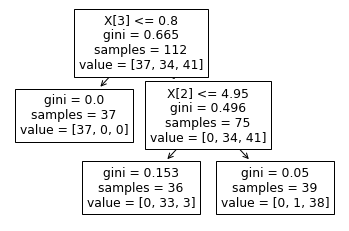

In [3]:
from sklearn import tree
tree.plot_tree(clf)

In [43]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
labels = [np.argmax(v) for v in clf.tree_.value]


In [6]:
clf.tree_.value

array([[[37., 34., 41.]],

       [[37.,  0.,  0.]],

       [[ 0., 34., 41.]],

       [[ 0., 33.,  3.]],

       [[ 0.,  1., 38.]]])

In [42]:
values

[2, 0, 2, 1, 2]

In [27]:
def getLength(feat, thresh):
    return 1

def getLengthLeaf(label):
    return 2

def getString(tree):

    tree_string = "("

    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    n_nodes = clf.tree_.node_count

    labels = [np.argmax(v) for v in clf.tree_.value]


    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
    

    curr_depth = 0
    interior_node_weights = []


    for i in range(n_nodes):
        depth = node_depth[i]

        if depth != curr_depth:
            tree_string += "("
            curr_depth = depth
            
       
        if is_leaves[i]:
            tree_string += "Leaf" + str(i) + ": " + str(getLengthLeaf(labels[i])) + ", "
            
        else:
            
            interior_node_weights.append("):" + str(getLength(feature[i], threshold[i])))
            #tree_string += "Node" + str(i) + ": " + str(getLength(feature[i], threshold[i])) + ", "
    
    tree_string = tree_string[:-2]
    for i in range(curr_depth):
        tree_string += interior_node_weights[i]

    tree_string += ";"
    return tree_string
            

In [28]:
getString(clf)

'((Leaf1: 2, (Leaf3: 2, Leaf4: 2):1):1;'

In [11]:
import Bio

In [12]:
pip install --upgrade nyoka

     |████████████████████████████████| 303 kB 6.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [19]:
from nyoka import skl_to_pmml
res = skl_to_pmml(pipeline=pipeline_obj,col_names=iris.feature_names,target_name="species",pmml_f_name="decision_tree.pmml")

In [21]:
from Bio import Phylo


In [32]:
tree = Phylo.parse("decision_tree.pmml", "phyloxml")

In [24]:
tree

<generator object parse at 0x7fa0007f4ca8>

In [35]:
for t in tree:
    print(1, t)